In [1]:
from diff_classifier import features as ft
from diff_classifier import heatmaps as hm
from diff_register import im_process as imp
from diff_classifier import aws
import pandas as pd
import skimage.io as sio
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import xml.etree.ElementTree as et
import diff_register.register as reg
from skimage import transform as tf

# Trajectory Data

In [2]:
prefix = '100nm_S2_XY1_1'
fname = 'features_{}.csv'.format(prefix)
msds_f = 'msd_{}.csv'.format(prefix)
features = pd.read_csv(fname, index_col='Unnamed: 0')
msds = pd.read_csv(msds_f, index_col='Unnamed: 0')

/home/ubuntu/miniconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(-0.5, 2047.5, 2043.5, -0.5)

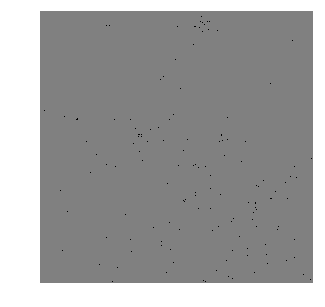

In [3]:
rfolder = 'Tissue_Studies/04_23_18_Registration_Test/tracking'
aws.download_s3('{}/{}.tif'.format(rfolder, prefix), '{}.tif'.format(prefix), bucket_name='ccurtis.data')
trim = sio.imread('{}.tif'.format(prefix))

fig = plt.figure(figsize=(5, 5))
plt.imshow(trim[0, :, :]<0.1, vmin=0, vmax=2, cmap='gray')
plt.axis('off')

# Cell Image

In [4]:
cprefix = 'S1_NUC'
cfile = '{}.tif'.format(cprefix)
cfolder = 'Tissue_Studies/04_23_18_Registration_Test'

#aws.download_s3('{}/{}'.format(cfolder, cfile), cfile, bucket_name='ccurtis.data')

cim = sio.imread(cfile)

pxrat_cells = 1.24
pxrat_traj = 0.16
dim_traj = 2048
dim_cells = int(np.round(dim_traj*pxrat_traj/pxrat_cells, decimals=0))

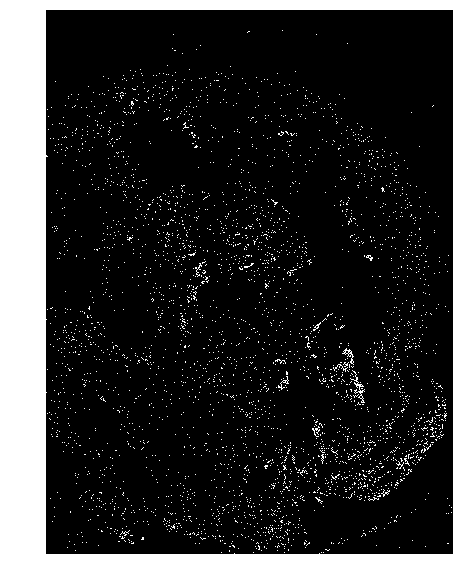

In [5]:
binary0 = imp.clean_image('.', cfile, threshold=100, close=True, show=True, default_name=False, fname='clean_test.tif')

In [6]:
short_image, props = binary0

# binary0 = sio.imread('short_clean_test.png')
# binary0 = binary0 > 1

/home/ubuntu/miniconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(-0.5, 2047.5, 2047.5, -0.5)

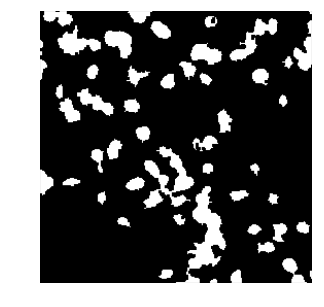

In [7]:


subim = reg.crop_to_videodims(short_image, multichannel=False, vidpoint=(9000, 12000), dim=dim_cells, save=True,
                              fname='test.tif', correction=(35, 5), dim_traj=dim_traj)

fig = plt.figure(figsize=(5, 5))
plt.imshow(subim, cmap='gray')
plt.axis('off')

In [62]:
particles = int(max(msds['Track_ID']))
all_frames = msds.shape[0]

in_cell = all_frames*['a']#np.zeros(all_frames)
for i in range(0, all_frames):
    #print(i)
    x = msds['X'].as_matrix()[i]
    y = msds['Y'].as_matrix()[i]
    if x < 100000:
        in_cell[i] = subim[int(x), int(y)]
    else:
        in_cell[i] = np.nan

nan

In [ ]:
msds['X'].as_matrix()

In [ ]:
subim.shape